In [1]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# データの読み込み
# INPUT_DIRにディレクトリを指定
INPUT_DIR = "xxx"

df_train = pd.read_csv(INPUT_DIR + "train.csv")
df_test = pd.read_csv(INPUT_DIR + "test.csv")
data_dic = pd.read_csv(INPUT_DIR + "data_dictionary.csv")# 辞書データ
sample_sub = pd.read_csv(INPUT_DIR + "sample_submission.csv", header=None)
df_train.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


In [3]:
df_test.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
0,28800,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
1,28801,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
2,28802,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3 non-null      int64  
 1   dri_score               3 non-null      object 
 2   psych_disturb           3 non-null      object 
 3   cyto_score              1 non-null      object 
 4   diabetes                3 non-null      object 
 5   hla_match_c_high        2 non-null      float64
 6   hla_high_res_8          2 non-null      float64
 7   tbi_status              3 non-null      object 
 8   arrhythmia              3 non-null      object 
 9   hla_low_res_6           3 non-null      float64
 10  graft_type              3 non-null      object 
 11  vent_hist               3 non-null      object 
 12  renal_issue             3 non-null      object 
 13  pulm_severe             3 non-null      object 
 14  prim_disease_hct        3 non-null      object

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

In [6]:
df_train.isnull().sum()

ID                            0
dri_score                   154
psych_disturb              2062
cyto_score                 8068
diabetes                   2119
hla_match_c_high           4620
hla_high_res_8             5829
tbi_status                    0
arrhythmia                 2202
hla_low_res_6              3270
graft_type                    0
vent_hist                   259
renal_issue                1915
pulm_severe                2135
prim_disease_hct              0
hla_high_res_6             5284
cmv_status                  634
hla_high_res_10            7163
hla_match_dqb1_high        5199
tce_imm_match             11133
hla_nmdp_6                 4197
hla_match_c_low            2800
rituximab                  2148
hla_match_drb1_low         2643
hla_match_dqb1_low         4194
prod_type                     0
cyto_score_detail         11923
conditioning_intensity     4789
ethnicity                   587
year_hct                      0
obesity                    1760
mrd_hct 

In [7]:
df_train.describe()

,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,...,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,...,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,...,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,...,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,...,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,...,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000


**ノートブックを参考にしてみる**  
参考：https://www.kaggle.com/code/samanfatima7/cibmtr-bridging-gaps-in-survival

In [8]:
import lifelines
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from lifelines import KaplanMeierFitter
from sklearn.metrics import mean_squared_error
import warnings

**生存関数に関して**  
- Kaplan-Meier推定量を用いた生存関数の推定  
    - 「生存期間」と「生存フラグ」から『特定の期間における生存確率』を算出
    - 今回はこの『生存確率』が目的変数
- 参考：https://qiita.com/roki18d/items/3d725333ff1616a8977c

In [9]:
# 生存確率を計算する関数
# efs：無イベント生存率
# efs_time：無イベント生存までの時間
def transform_survival_probability(df, time_col='efs_time', event_col='efs'):
    kmf = KaplanMeierFitter() # インスタンスを作成
    kmf.fit(df[time_col], event_observed=df[event_col]) # カプラン・マイヤー推定量にデータをフィット
    survival_probabilities = kmf.survival_function_at_times(df[time_col]).values.flatten()
    censored_mask = df[event_col] == 0
    return survival_probabilities

In [10]:
# 生存確率を目的変数として代入
df_train["target"] = transform_survival_probability(df_train, time_col='efs_time', event_col='efs')
df_train.head(  )

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,target
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356,0.458687
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672,0.847759
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793,0.462424
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349,0.456661
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223,0.464674


In [11]:
# 不要になったカラムを削除
drop_cols = ["ID", 'efs', 'efs_time']
df_trainainain = df_train.drop(columns=[col for col in drop_cols if col in df_train.columns])
df_test = df_test.drop(columns=[col for col in drop_cols if col in df_test.columns])
df_train.head()

,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,...,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,target
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,...,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356,0.458687
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,...,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672,0.847759
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793,0.462424
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,...,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349,0.456661
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,...,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223,0.464674


**EDA**

In [12]:
import plotly.express as px
from IPython.display import display, HTML

In [13]:
import warnings
import colorama
from colorama import Fore, Style
from catboost import CatBoostClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import randint
from catboost import CatBoostClassifier
# import lightgbm
# from lightgbm import LGBMClassifier

from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold

In [14]:
# Helper function for error messages
def print_error(message):
    print(f"An error occurred: {message}")

# Helper function to generate a colored horizontal line
def colored_line(color="#323c6a"):
    return f"<hr style='border: none; height: 3px; background-color: {color}; margin: 15px 0;' />"

# Main function to analyze datasets
def print_dataset_analysis(train_dataset, test_dataset, n_top=5, heading_color="#323c6a", line_color="#323c6a"):
    try:
        # Display top rows
        display(HTML(colored_line(line_color)))
        display(HTML(f"Top {n_top} Rows of Training Dataset"))
        display(HTML(train_dataset.head(n_top).to_html(index=False)))
        
        display(HTML(colored_line(line_color)))
        display(HTML(f"Top {n_top} Rows of Test Dataset"))
        display(HTML(test_dataset.head(n_top).to_html(index=False)))
        
        # Dataset summary
        display(HTML(colored_line(line_color)))
        display(HTML("Summary of Dataset"))
        display(HTML(train_dataset.describe().to_html()))
        
        # Null values and percentages
        display(HTML(colored_line(line_color)))
        display(HTML("Null Values in Datasets"))
        
        train_null_count = train_dataset.isnull().sum()
        train_null_percentage = (train_null_count / len(train_dataset)) * 100
        train_null_summary = pd.DataFrame({
            "Null Count": train_null_count[train_null_count > 0],
            "Null Percentage (%)": train_null_percentage[train_null_percentage > 0]
        })
        
        test_null_count = test_dataset.isnull().sum()
        test_null_percentage = (test_null_count / len(test_dataset)) * 100
        test_null_summary = pd.DataFrame({
            "Null Count": test_null_count[test_null_count > 0],
            "Null Percentage (%)": test_null_percentage[test_null_percentage > 0]
        })
        
        # Display training dataset nulls
        display(HTML("<h3>Training Dataset:</h3>"))
        if train_null_count.sum() == 0:
            display(HTML("<p>No null values in the training dataset.</p>"))
        else:
            display(HTML(train_null_summary.to_html()))
        
        # Display test dataset nulls
        display(HTML("<h3>Test Dataset:</h3>"))
        if test_null_count.sum() == 0:
            display(HTML("<p>No null values in the test dataset.</p>"))
        else:
            display(HTML(test_null_summary.to_html()))
        
        # Duplicate rows
        display(HTML(colored_line(line_color)))
        display(HTML("Duplicate Values in Datasets"))
        
        train_duplicates = train_dataset.duplicated().sum()
        test_duplicates = test_dataset.duplicated().sum()
        
        display(HTML(f"<p><strong>Training Dataset:</strong> {train_duplicates} duplicate rows</p>"))
        display(HTML(f"<p><strong>Test Dataset:</strong> {test_duplicates} duplicate rows</p>"))
        
        # Shape of datasets
        display(HTML(colored_line(line_color)))
        display(HTML("Dataset Shape"))
        display(HTML(f"<p><strong>Training Dataset:</strong> {train_dataset.shape[0]} rows, {train_dataset.shape[1]} columns</p>"))
        display(HTML(f"<p><strong>Test Dataset:</strong> {test_dataset.shape[0]} rows, {test_dataset.shape[1]} columns</p>"))
    
    except Exception as e:
        print_error(str(e))

# Function to display unique values in columns
def print_unique_values(dataset, line_color="#323c6a"):
    try:
        display(HTML(colored_line(line_color)))
        display(HTML("Unique Values in Dataset"))
        
        unique_values_table = "<table style='border-collapse: collapse; width: 100%; text-align: left;'>"
        unique_values_table += "<tr style='background-color: #5fa1bc; color: yellow;'><th>Column Name</th><th>Data Type</th><th>Unique Values</th></tr>"
        
        for column in dataset.columns:
            unique_values = dataset[column].unique()[:7]
            unique_values_str = ', '.join(map(str, unique_values))
            data_type = dataset[column].dtype
            unique_values_table += f"<tr><td>{column}</td><td>{data_type}</td><td>{unique_values_str}</td></tr>"
        
        unique_values_table += "</table>"
        display(HTML(unique_values_table))
    
    except Exception as e:
        print_error(str(e))

In [15]:
print_dataset_analysis(df_train, df_test)
print_unique_values(df_train)

ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,target
0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356,0.458687
1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672,0.847759
2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793,0.462424
3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349,0.456661
4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223,0.464674


dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10
N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0
Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0
N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0


,ID,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,hla_match_a_high,donor_age,hla_match_b_low,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time,target
count,28800.000000,24180.000000,22971.000000,25530.000000,23516.000000,21637.000000,23601.000000,24603.000000,26000.000000,26157.000000,24606.000000,28800.000000,24499.000000,26992.000000,26235.000000,28800.000000,26410.000000,24712.00000,28323.000000,27930.00000,25147.000000,25448.000000,23736.000000,28800.000000,28800.000000,28800.000000
mean,14399.500000,1.764516,6.876801,5.143322,5.109202,8.617230,1.736876,5.160346,1.757808,1.715296,1.773795,2015.179444,1.703743,42.511591,1.719916,38.663162,1.709087,1.69962,1.702327,83.83208,6.903448,1.707128,8.664687,0.539306,23.237678,0.606189
std,8313.988213,0.431941,1.564313,1.207757,1.214162,1.905125,0.447687,1.203240,0.435453,0.451282,0.427130,3.153914,0.462213,15.251434,0.454449,21.147581,0.458259,0.46518,1.994443,11.02884,1.565017,0.461179,1.882746,0.498461,24.799748,0.176714
min,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2008.000000,0.000000,18.010000,0.000000,0.044000,0.000000,0.00000,0.000000,40.00000,2.000000,0.000000,4.000000,0.000000,0.333000,0.452727
25%,7199.750000,2.000000,6.000000,4.000000,4.000000,7.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2013.000000,1.000000,28.447000,1.000000,19.539000,1.000000,1.00000,0.000000,70.00000,6.000000,1.000000,7.000000,0.000000,5.619750,0.459063
50%,14399.500000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2016.000000,2.000000,40.063000,2.000000,41.006000,2.000000,2.00000,1.000000,90.00000,8.000000,2.000000,10.000000,1.000000,9.796500,0.503470
75%,21599.250000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2018.000000,2.000000,56.131500,2.000000,55.965250,2.000000,2.00000,2.000000,90.00000,8.000000,2.000000,10.000000,1.000000,35.100000,0.750232
max,28799.000000,2.000000,8.000000,6.000000,6.000000,10.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2020.000000,2.000000,84.800000,2.000000,73.726000,2.000000,2.00000,10.000000,100.00000,8.000000,2.000000,10.000000,1.000000,156.819000,0.999965


,Null Count,Null Percentage (%)
dri_score,154,0.534722
psych_disturb,2062,7.159722
cyto_score,8068,28.013889
diabetes,2119,7.357639
hla_match_c_high,4620,16.041667
hla_high_res_8,5829,20.239583
arrhythmia,2202,7.645833
hla_low_res_6,3270,11.354167
vent_hist,259,0.899306
renal_issue,1915,6.649306


,Null Count,Null Percentage (%)
cyto_score,2,66.666667
hla_match_c_high,1,33.333333
hla_high_res_8,1,33.333333
hla_high_res_10,1,33.333333
tce_imm_match,1,33.333333
cyto_score_detail,2,66.666667
conditioning_intensity,2,66.666667
mrd_hct,2,66.666667
tce_match,2,66.666667
donor_age,2,66.666667


Column Name,Data Type,Unique Values
ID,int64,"0, 1, 2, 3, 4, 5, 6"
dri_score,object,"N/A - non-malignant indication, Intermediate, High, Low, N/A - disease not classifiable, N/A - pediatric, TBD cytogenetics"
psych_disturb,object,"No, Not done, Yes, nan"
cyto_score,object,"nan, Intermediate, Poor, Other, Favorable, TBD, Normal"
diabetes,object,"No, Yes, Not done, nan"
hla_match_c_high,float64,"nan, 2.0, 1.0, 0.0"
hla_high_res_8,float64,"nan, 8.0, 7.0, 5.0, 6.0, 4.0, 3.0"
tbi_status,object,"No TBI, TBI +- Other, >cGy, TBI + Cy +- Other, TBI +- Other, <=cGy, TBI +- Other, unknown dose, TBI +- Other, -cGy, fractionated, TBI +- Other, -cGy, single"
arrhythmia,object,"No, Yes, nan, Not done"
hla_low_res_6,float64,"6.0, 4.0, 3.0, nan, 5.0, 2.0"


**欠損値補完**

In [16]:
# 欠損値には一律で同じ値を代入
def replace_nulls_with_default(df, float_default=0.0, object_default="Unknown"):
    for col in df.select_dtypes(include=['float']).columns:
        df[col] = df[col].fillna(float_default)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].fillna(object_default)
    return df

In [17]:
df_train = replace_nulls_with_default(df_train, float_default=-1.0, object_default="Missing")
df_test = replace_nulls_with_default(df_test, float_default=-1.0, object_default="Missing")
df_train.isnull().sum()

ID                0
dri_score         0
psych_disturb     0
cyto_score        0
diabetes          0
                 ..
pulm_moderate     0
hla_low_res_10    0
efs               0
efs_time          0
target            0
Length: 61, dtype: int64

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28800 non-null  object 
 2   psych_disturb           28800 non-null  object 
 3   cyto_score              28800 non-null  object 
 4   diabetes                28800 non-null  object 
 5   hla_match_c_high        28800 non-null  float64
 6   hla_high_res_8          28800 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              28800 non-null  object 
 9   hla_low_res_6           28800 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28800 non-null  object 
 12  renal_issue             28800 non-null  object 
 13  pulm_severe             28800 non-null  object 
 14  prim_disease_hct        28800 non-null

In [19]:
# ojbect型をcategory型に変換
def convert_object_to_category(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category')
    return df

df_train = convert_object_to_category(df_train)
df_test = convert_object_to_category(df_test)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      28800 non-null  int64   
 1   dri_score               28800 non-null  category
 2   psych_disturb           28800 non-null  category
 3   cyto_score              28800 non-null  category
 4   diabetes                28800 non-null  category
 5   hla_match_c_high        28800 non-null  float64 
 6   hla_high_res_8          28800 non-null  float64 
 7   tbi_status              28800 non-null  category
 8   arrhythmia              28800 non-null  category
 9   hla_low_res_6           28800 non-null  float64 
 10  graft_type              28800 non-null  category
 11  vent_hist               28800 non-null  category
 12  renal_issue             28800 non-null  category
 13  pulm_severe             28800 non-null  category
 14  prim_disease_hct      

In [20]:

def print_value_counts_less_than(df, threshold=50):
    for col in df.columns:
        value_counts = df[col].value_counts()
        if len(value_counts) < threshold:
            print(f"Value counts for column '{col}':")
            for val, count in value_counts.items():
                print(f"    {val}: {count}")
            print()

print_value_counts_less_than(df_train, threshold=30)

Value counts for column 'dri_score':
    Intermediate: 10436
    N/A - pediatric: 4779
    High: 4701
    N/A - non-malignant indication: 2427
    TBD cytogenetics: 2003
    Low: 1926
    High - TED AML case <missing cytogenetics: 1414
    Intermediate - TED AML case <missing cytogenetics: 481
    N/A - disease not classifiable: 272
    Very high: 198
    Missing: 154
    Missing disease status: 9

Value counts for column 'psych_disturb':
    No: 23005
    Yes: 3587
    Missing: 2062
    Not done: 146

Value counts for column 'cyto_score':
    Poor: 8802
    Missing: 8068
    Intermediate: 6376
    Favorable: 3011
    TBD: 1341
    Normal: 643
    Other: 504
    Not tested: 55

Value counts for column 'diabetes':
    No: 22201
    Yes: 4339
    Missing: 2119
    Not done: 141

Value counts for column 'hla_match_c_high':
    2.0: 18565
    1.0: 5536
    -1.0: 4620
    0.0: 79

Value counts for column 'hla_high_res_8':
    8.0: 13568
    -1.0: 5829
    4.0: 3820
    7.0: 2385
    5.0: 16

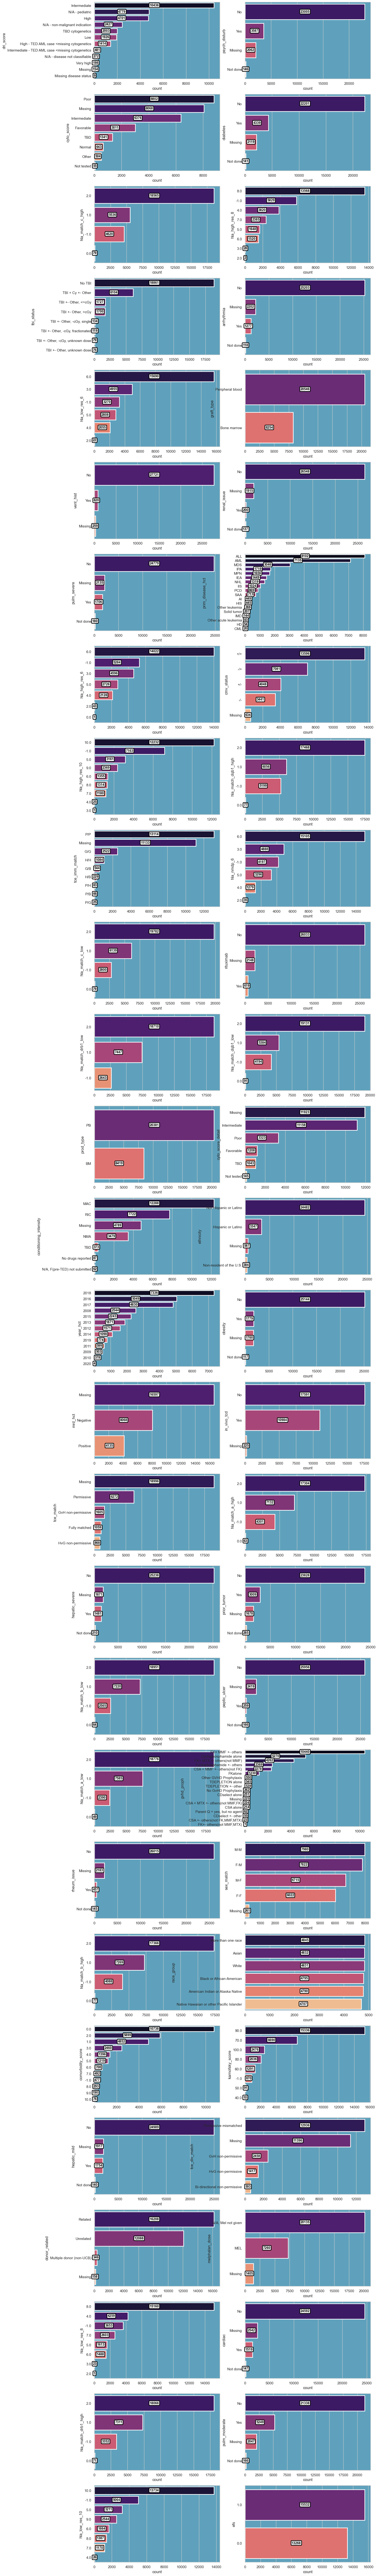

In [21]:
# カテゴリの分布可視化
def plot_low_value_count_columns(df):
    background_color = '#5fa1bc'
    sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})
    
    low_value_count_columns = [col for col in df.columns if df[col].nunique() < 20]
    num_plots = len(low_value_count_columns)
    num_rows = (num_plots + 1) // 2  
    num_cols = 2 
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    for i, col in enumerate(low_value_count_columns):
        p = sns.countplot(y=col, data=df, palette='magma', edgecolor='white', linewidth=2, ax=axs[i], order=df[col].value_counts().index)
        for container in p.containers:
            plt.bar_label(container, label_type='center', color="black", fontsize=10, weight='bold', padding=6, position=(0.5, 0.5),
                          bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
    
    plt.tight_layout()
    plt.show()

plot_low_value_count_columns(df_train)

**モデル構築**

In [22]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import StratifiedKFold

# Custom function to compute the Stratified Concordance Index (C-index)
def stratified_c_index(y_true, y_pred, groups):
    unique_groups = np.unique(groups)
    c_indices = []

    for group in unique_groups:
        mask = groups == group
        if sum(mask) > 1:  
            y_true_group = y_true[mask]
            y_pred_group = y_pred[mask]
            concordant = 0
            permissible = 0

            for i in range(len(y_true_group)):
                for j in range(i + 1, len(y_true_group)):
                    if y_true_group[i] != y_true_group[j]:
                        permissible += 1
                        if (y_pred_group[i] > y_pred_group[j] and y_true_group[i] > y_true_group[j]) or \
                           (y_pred_group[i] < y_pred_group[j] and y_true_group[i] < y_true_group[j]):
                            concordant += 1

            c_indices.append(concordant / permissible if permissible > 0 else 0)

    c_indices = np.array(c_indices)
    return np.mean(c_indices) - np.std(c_indices)

In [23]:
# Sample dataset
X = df_train.drop(columns=['target'], axis=1)
y = df_train['target']
race_groups = df_train['race_group']  

# Convert categorical features for CatBoost
cat_features = list(X.select_dtypes(include=['object', 'category']).columns)

# K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
final_predictions = np.zeros(len(X))

for fold, (train_idx, val_idx) in enumerate(kf.split(X, race_groups)):
    print(f"Fold {fold + 1}")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    race_val = race_groups.iloc[val_idx]

    train_pool = Pool(X_train, y_train, cat_features=cat_features) # catboost専用のデータ形式
    val_pool = Pool(X_val, y_val, cat_features=cat_features)

    # Model with tuned hyperparameters
    model = CatBoostRegressor(
        iterations=1000,
        learning_rate=0.05,
        depth=6,
        l2_leaf_reg=3,
        loss_function='RMSE',
        random_seed=42,
        verbose=100,
        train_dir = None,
        # task_type='GPU',
    )

    model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=50)

    # Predict and compute metric
    y_val_pred = model.predict(X_val)
    fold_score = stratified_c_index(y_val.values, y_val_pred, race_val.values)
    print(f"Stratified C-Index for Fold {fold + 1}: {fold_score}")

    final_predictions[val_idx] = y_val_pred

# Overall Stratified Concordance Index
overall_score = stratified_c_index(y.values, final_predictions, race_groups.values)
print(f"Overall Stratified C-Index: {overall_score}")

Fold 1
0:	learn: 0.1681820	test: 0.1694623	best: 0.1694623 (0)	total: 98.4ms	remaining: 1m 38s
100:	learn: 0.0028543	test: 0.0030045	best: 0.0030045 (100)	total: 3.11s	remaining: 27.7s
200:	learn: 0.0017236	test: 0.0018129	best: 0.0018129 (200)	total: 6.13s	remaining: 24.4s
300:	learn: 0.0013656	test: 0.0014526	best: 0.0014526 (300)	total: 9.15s	remaining: 21.3s
400:	learn: 0.0012608	test: 0.0013457	best: 0.0013457 (400)	total: 12.2s	remaining: 18.2s
500:	learn: 0.0011937	test: 0.0012816	best: 0.0012815 (498)	total: 15.1s	remaining: 15.1s
600:	learn: 0.0011342	test: 0.0012230	best: 0.0012230 (600)	total: 18.1s	remaining: 12s
700:	learn: 0.0010896	test: 0.0011828	best: 0.0011827 (698)	total: 21.1s	remaining: 8.99s
800:	learn: 0.0010539	test: 0.0011518	best: 0.0011518 (800)	total: 24.1s	remaining: 5.99s
900:	learn: 0.0010317	test: 0.0011332	best: 0.0011332 (896)	total: 27.1s	remaining: 2.98s
999:	learn: 0.0010015	test: 0.0011062	best: 0.0011062 (998)	total: 30.1s	remaining: 0us

bestTest

In [24]:
pred = model.predict(df_test)
print(pred)

CatBoostError: features data: pandas.DataFrame column 'dri_score' has dtype 'category' but is not in  cat_features list

**提出**

In [ ]:
# # 提出用ファイルに代入
# sample_sub['prediction'] = pred
# sample_sub.to_csv('submission.csv', index=False)